# **import necessary libraries**

In [2]:
import json
import os
import csv

import nltk
import pandas as  pd
import numpy as np
import spacy

import seaborn as sns
import string

from tqdm import tqdm
from textblob import TextBlob

from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

import re


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import classification_report, confusion_matrix


# **Dataset exploration**

<Axes: xlabel='category'>

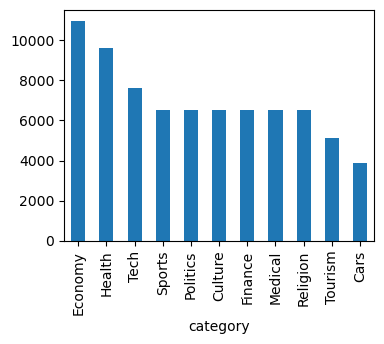

In [3]:
df = pd.read_csv('articles.csv')
df['category'].value_counts().plot( kind='bar', figsize=(4,3))

In [4]:
df.groupby('category').describe()

article                                                            \
           count unique                                                top   
category                                                                     
Cars        3864   3864  فولكسفاغن تقلص شبكة موزعيها وتتوجه إلى التسويق...   
Culture     6500   6495  يتمتع الفنان التشكيلي المغربي أحمد جاريد بمرجع...   
Economy    10961  10961  2.98 تريليون دولار أصول الصناديق السيادية العر...   
Finance     6500   6499  شهدت ملكيات كبار الملاك للشركات المدرجة في سوق...   
Health      9613   9613  اختبار جديد لتشخيص سرطان البروستاتا في المنزل ...   
Medical     6500   6500  ناقشت العيادة الذكية لهيئة الصحة بدبي أمس التط...   
Politics    6500   6499  نشرت مجموعة قراصنة الإنترنت أنونيموس الليلة قب...   
Religion    6500   6493  إعداد: محمد صالح القرق دخل على رسول الله- صلى ...   
Sports      6500   6499  سيفتقد منتخب البيرو في كوبا أمريكا التي تحتضنه...   
Tech        7637   7637  للعام الثاني على التوالي، حصلت شركة اس تي اس (...   
Tourism     5143   5143  انطلاق معرض "ديزرت إكس العلا" قريباً بمشاركة ف...   

               
         freq  
category       
Cars        1  
Culture     2  
Economy     1  
Finance     2  
Health      1  
Medical     1  
Politics    2  
Religion    3  
Sports      2  
Tech        1  
Tourism     1

**Preprocessing**

In [5]:
# we use this method to enumerate the categoreis
def enumerate_categories(category):
    if category =='Sports':
        return 1
    elif category =='Politics':
        return 2
    elif category =='Culture':
        return 3
    elif category =='Finance':
        return 4
    elif category =='Medical':
        return 5
    elif category =='Religion':
        return 6
    elif category =='Tech':
        return 7
    elif category =='Cars':
        return 8
    elif category =='Economy':
        return 9
    elif category =='Health':
        return 10
    elif category =='Tourism':
        return 11

In [6]:
# creat new feature that contain the category in number
df['category_id'] = df['category'].apply(enumerate_categories)

In [7]:
df

,article,category,category_id
0,احتفظ بنفيكا بمركز الصدارة بعد فوزه على مضيفه ...,Sports,1
1,كشفت تقارير عن موافقة النجم الفرنسي أنطوان غري...,Sports,1
2,أدلى مدرب فريق برشلونة الاسباني لكرة القدم خوس...,Sports,1
3,أعلن بلد الوليد صاحب المركز التاسع عشر قبل الأ...,Sports,1
4,أعلن ريال مدريد الإسباني بطل أوروبا أمس تمديد ...,Sports,1
...,...,...,...
76213,السعودية تحتل المركز 62 عالمياً في جذب السياح ...,Tourism,11
76214,مطار جديد ومشروع سكك حديدية فائقة السرعة في ال...,Tourism,11
76215,848 مليون دولار عائدات السياحة في اليمن بـ2012...,Tourism,11
76216,السياحة المصرية تعلق آمالها على روسيا بـ2014 \...,Tourism,11


In [ ]:
import re
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

In [8]:
# start the preprcessing
st = ISRIStemmer()

def preprocess_article(article):

    article = remove_extra_spaces(article)
    # hna drna toknization 
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(article)
    # hna drna part of speech tagging
    pos = pos_tag(tokens)
    '''# lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(pos_tag)) for token, pos_tag in pos]'''
    # hna drna stopword removal
    ar_sw = set(stopwords.words('arabic'))
    filtered_tokens = [token for token in stemming(pos) if token not in ar_sw]
    # bind tokens back 
    enhanced_article = ' '.join(filtered_tokens)
    
    return enhanced_article

def stemming(tags):
    stemed_tokens = []
    for token,tag in tags:
        if tag == 'NNP':
            stemed_tokens.append(token)
        else:
            stem = st.stem(token)
            stemed_tokens.append(stem)
    return stemed_tokens

In [9]:
# applt the preprocessing to our articles
df['article'] = df['article'].apply(preprocess_article)
df.head(3)

,article,category,category_id
0,حفظ بنفيكا بمركز الصدارة فوزه مضيفه ناسيونال ا...,Sports,1
1,كشف تقارير موافقة النجم الفرنسي أنطوان غريزمان...,Sports,1
2,دلى مدرب فريق برشلونة الاسباني لكرة القدم خوسي...,Sports,1


# **Train the model**

**naive bayes**

In [10]:
# split eour data into test and train
X_train, X_test, y_train, y_test = train_test_split(df.article,df.category_id)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vctorizer = CountVectorizer()
X_train_count = count_vctorizer.fit_transform(X_train.values)

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB() # in our case MultinomialNB() is the suitable classifier 
nb_model.fit(X_train_count,y_train)

MultinomialNB()

**SVM**

In [49]:
from sklearn.svm import SVC
svm_model= SVC()

In [50]:
svm_model.fit(X_train_count,y_train)

SVC()

**Decision Tree**

In [54]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()

In [18]:
dt_model.fit(X_train_count,y_train)

DecisionTreeClassifier()

**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_count,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Random forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20)

In [46]:
rf_model.fit(X_train_count,y_train)

RandomForestClassifier(n_estimators=20)

# **Making Predictions**

In [23]:
def categories_category(category):
    if category == 1:
        return 'Sports'
    elif category == 2:
        return 'Politics'
    elif category == 3:
        return 'Culture'
    elif category == 4:
        return 'Finance'
    elif category == 5:
        return 'Medical'
    elif category == 6:
        return 'Religion'
    elif category == 7:
        return 'Tech'
    elif category == 8:
        return 'Cars'
    elif category == 9:
        return 'Economy'
    elif category == 10:
        return 'Health'
    elif category == 11:
        return 'Tourism'


In [39]:
# method to predict the press article category
def predect_new_category(article, model_name):
    article_count_vctorizer = count_vctorizer.transform(article)
    category = categories_category(model_name.predict(article_count_vctorizer)[0])
    probabilities = model_name.predict_proba(article_count_vctorizer)
    sport_p = probabilities[0][0]
    politic_p = probabilities[0][1]
    return category, sport_p, politic_p

In [87]:
# here we test our model with some articles
article1 = [
    'توج فريق باير ليفركوزن بلقب الدوري الألماني لكرة القدم لأول مرة منذ تأسيسه قبل 120 عاماً، اليوم الأحد، بعد الفوز على ضيفه فيردر بريمن بنتيجة 5-0، ضمن منافسات الجولة الـ29 من المسابقة. وحسم ليفركوزن اللقب التاريخي لصالحه قبل 5 جولات من انتهاء المسابقة، منهيا هيمنة بايرن ميونيخ على البوندسليغا التي امتدت 11 موسما. وفرض البديل فلوريان فيرتس نفسه نجما للقاء بتسجيله ثلاثية "هاتريك" (68 و83 و90)، بعدما افتتح النيجيري فيكتور بونيفايس التسجيل (25 من ركلة جزاء)، وأضاف السويسري غرانيت تشاكا الثاني (60). وتقدم ليفركوزن الذي رفع رصيده إلى 79 نقطة في المركز الأول بفارق 16 نقطة عن وصيفيه بايرن ميونخ وشتوتغارت الثالث (63 نقطة لكل منهما) قبل 5 جولات من النهاية، واضعا حدا لهيمنة عملاق بافاريا على اللقب بين عامي 2013 و2023.'
]
article2 = [
    'شكّل الهجوم الإيراني غير المسبوق على إسرائيل باستخدام مئات المسيّرات، والصواريخ، الليلة قبل الماضية ذروة أسبوعين من التوتر بذلت خلالهما واشنطن جهودا كبيرة لمنع تدهور الوضع في المنطقة. وأعلنت القيادة العسكرية الأميركية الوسطى (سنتكوم)، أمس الأحد، أن الولايات المتحدة، وبدعم من مدمرات أوروبية، تمكنت من تدمير "أكثر من 80″ مسيّرة و6 صواريخ باليستية على الأقل مخصصة لضرب إسرائيل انطلاقا من إيران واليمن خلال الهجوم الإيراني". ووفقا لمسؤول عسكري أميركي، انطلق من إيران نحو 100 صاروخ باليستي متوسط المدى، وأكثر من 30 صاروخ كروز، وما لا يقل عن 150 مسيّرة هجومية استهدفت إسرائيل، كما أحصى الجيش الإسرائيلي من جهته أكثر من 350 مقذوفا، وقال إن 99% منها دمر. ودمرت سفينتان أميركيتان موجودتان في المنطقة، هما "يو إس إس أرلي بيرك" و"يو إس إس كارني"، 6 صواريخ، قبل أن تتدخل طائرات، وتدمر بدورها أكثر من 70 مسيّرة إيرانية. وأسقطت بطارية صواريخ باتريوت صاروخ كروز في مكان ليس بعيدا عن مدينة أربيل العراقية في كردستان العراق. ودمّرت القوات الأميركية أيضا "صاروخا باليستيا على مركبة الإطلاق، كما دمرت 7 مسيّرات على الأرض قبل إطلاقها في مناطق باليمن تسيطر عليها جماعة الحوثيين المدعومة من إيران"، وفق سنتكوم.'
]
#print(f'category of first article is (nb): {predect_new_category(article1, nb_model)}')
#print(f'category of first article is (svm): {predect_new_category(article1, svm_model)}')
#print(f'category of first article is (dt): {predect_new_category(article1, dt_model)}')
print(f'category of first article is (lr): {predect_new_category(article1, lr_model)}')

#print(f'category of second article is (nb): {predect_new_category(article2, nb_model)}')
#print(f'category of second article is (svm): {predect_new_category(article2, svm_model)}')
#print(f'category of second article is (dt): {predect_new_category(article2, dt_model)}')
print(f'category of second article is (lr): {predect_new_category(article2, lr_model)}')

category of first article is (lr): ('Sports', 1.0, 9.755811231063653e-108, 4.0988486712507274e-109)
category of second article is (lr): ('Politics', 3.422283415124464e-101, 1.0, 1.2607682391030228e-89)


In [17]:
# save our dataframe in a csv file in case if we need to work with it in future
df.to_csv('enhanced_articles.csv', index=False)

# **Evaluating Performance**

**naive bayes model Performance**

In [44]:
from sklearn.metrics import accuracy_score
X_test_counts = count_vctorizer.transform(X_test)

nb_pred = nb_model.predict(X_test_counts)

nb_acc = accuracy_score(y_test, nb_pred)
print("accuracy:", nb_acc) # accuracy ostoriya ^_^

accuracy: 0.9250065599580163


**SVM model Performance**

In [51]:
svm_pred = svm_model.predict(X_test_counts)
svm_acc = accuracy_score(y_test, svm_pred)
print("accuracy:", svm_acc)

accuracy: 0.9321962739438467


**Decision Tree**

In [34]:
dt_pred = dt_model.predict(X_test_counts)
dt_acc = accuracy_score(y_test, dt_pred)
print("accuracy:", dt_acc)

accuracy: 0.9628717948717949


**Logistic Regression**

In [15]:
from sklearn.metrics import accuracy_score
X_test_counts = count_vctorizer.transform(X_test)
lr_pred = lr_model.predict(X_test_counts)
lr_acc = accuracy_score(y_test, lr_pred)
print("accuracy:", lr_acc)

accuracy: 0.9569141957491472


**Random Forest**

In [48]:
rf_pred = rf_model.predict(X_test_counts)
rf_acc = accuracy_score(y_test, rf_pred)
print("accuracy:", rf_acc)

accuracy: 0.9018105484124902


In [100]:
from sklearn.model_selection import cross_val_score
nb_score = max(cross_val_score(nb_model, X_train_count,y_train))
print(nb_score)

0.9907692307692307


**Choose the best model**

In [56]:
from sklearn.linear_model import LogisticRegression

model_params = {
    'nb': {
        'model': MultinomialNB(),
        'params' : {
        }  
    },
    'decesion_tree': {
        'model': tree.DecisionTreeClassifier(),
        'params' : {
            
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20]
        }
    }
}

In [57]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_count, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_best_model = pd.DataFrame(scores,columns=['model','best_score'])
df_best_model

,model,best_score
0,nb,0.925074
1,random_forest,0.896874
2,logistic_regression,0.956598


In [61]:
best_model = clf.best_estimator_
best_model

LogisticRegression(C=1, solver='liblinear')

In [59]:
df_best_model = pd.DataFrame(scores,columns=['model','best_score']).sort_values(by='best_score', ascending=False)
df_best_model

,model,best_score
2,logistic_regression,0.956598
0,nb,0.925074
1,random_forest,0.896874


**save and load the model**

In [16]:
import joblib

In [17]:
joblib.dump(lr_model,'new_press_articles_classifier.pkl')

['new_press_articles_classifier.pkl']

In [18]:
joblib.dump(count_vctorizer,'count_vctorizer.pkl')

['count_vctorizer.pkl']

In [20]:
my_model= joblib.load('new_press_articles_classifier.pkl')

In [42]:
article3 = [
    'تباينت ردود الفعل الدولية بعد ورود تقارير عن ضربة إسرائيلية على مدينة أصفهان الإيرانية، فجر اليوم الجمعة، فيما يبدو ردا على الهجوم الذي شنته إيران بمئات الصواريخ والمسيرات الأسبوع الماضي على إسرائيل. فقد دعت رئيسة المفوضية الأوروبية أورسولا فون دير لاين إيران وإسرائيل وحلفاءهما إلى الامتناع عن التصعيد في الشرق الأوسط. وقالت وهي تقف بجانب رئيس الوزراء الفنلندي بيتري أوربو في لابينرانتا بفنلندا على بعد نحو 25 كيلومترا من الحدود الروسية "من الضروري للغاية أن تظل المنطقة مستقرة وأن تمتنع جميع الأطراف عن اتخاذ المزيد من الإجراءات". كما أعلنت الخارجية الصينية أن بكين تعارض أي عمل من شأنه تصعيد التوتر في المنطقة، وستواصل القيام بدور بناء في تعزيز تهدئة الوضع. وقالت روسيا إنها تدرس المعلومات المتعلقة بالضربة الإسرائيلية المزعومة على إيران وتحث الجانبين على ضبط النفس.انضم المهاجم هوغو إيكيتيكي بشكل نهائي إلى آينتراخت فرانكفورت، بعد أن قام النادي الألماني بتفعيل بند شراء عقده من باريس سان جيرمان. انتل إيكيتيكي إلى صفوف فرانكفورت في يناير الماضي على سبيل الإعارة حتى نهاية الموسم مع خيار الشراء. وبات المهاجم البالغ من العمر 21 عاماً مرتبطاً بشكل نهائي مع فرانكفورت سادس الدوري الألماني، ويمتد عقده مع الفريق حتى 2029. منذ مباراته الأولى مع الفريق الألماني في فبراير الماضي، سجل إيكيتيكي هدفاً واحداً فقط وكان أمام أوغسبورغ يوم الجمعة الماضي. وانتقل إيكيتيكي إلى صفوف باريس سان جيرمان في صيف عام 2022 على سبيل الاعارة من رينس، وتعاقد معه فريق العاصمة الفرنسية بشكل نهائي الصيف الماضي لكنه لم يلعب أي مباراة منذ أغسطس 2023. اللاعب الفرنسي خاض 33 مباراة مع النادي الباريسي، وسجل أربعة أهداف مع أربع تمريرات حاسمة'
]
predect_new_category(article3, my_model)

('Sports', 0.997539639907505, 0.00021408192158735824)